# Bike Sharing Assignment
#####                                                                                                                                                                            Submitted By: Koustav Chakraborty

### Project Brief:<br>

**Problem statement:**<br>

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.<br>

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.<br>


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.<br>


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

•	Which variables are significant in predicting the demand for shared bikes.<br>
•	How well those variables describe the bike demands.


Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

**Data Available for Analysis:**

 Bike Sharing Dataset (day.csv)


**Bussiness Objective:**<br>

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.


**Goal of the Projrct:**<br>

1. Exploratory Data Analysis.
2. Building a multiple linear regression model for the prediction of demand for shared bikes.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Importing the required python liberaries
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
# setting a seaborn style of my preference
sns.set_style("whitegrid")

## Step 1: Reading and Understanding Data

<br>
Reading and loading the data which is given as day.csv

In [3]:
day = pd.read_csv("C:\\Users\\koustav\\Desktop\\day.csv",encoding= 'unicode_escape')

In [4]:
# Checking it's Shape
day.shape



(730, 16)

In [5]:
day.size

11680

In [6]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [7]:
day.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,6/1/2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,7/1/2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,8/1/2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,9/1/2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10/1/2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [8]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Insight:**<br>
Except one column which is date type, all other are either float or integer type.
There are some fields that are categorical in nature, but are in integer/float type. Example : season, mnth, weathersit etc.
We will have to analyze and decide whether to convert them to categorical or treat as integer. From data dictionary file provided more information of these categorical columns can be inferred.

In [9]:
# Checking if instant column has unique entries, if yes, then will convert it to index
day['instant'].nunique()

730

In [10]:
# Setting the instant column as index to number of columns
day.set_index('instant', inplace=True)
day.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
6,6/1/2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
7,7/1/2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
8,8/1/2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
9,9/1/2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822


From the data provided and looking at the data dictionary I can assume that following are independent and dependent variable as mentioned below-

### Data Cleaning

In [11]:
# Checking Data type
day.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [12]:
# summing up the missing values count (column-wise)
day.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There is no null value column wise

In [13]:
# check how many rows have all missing values
day.isnull().all(axis=1).sum()

0

There is no missing value row-wise also.


In [14]:
# missing values per column expressed as % of total number of values
round(100*(day.isnull().sum()/len(day.index)), 2)

dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [15]:
# Converting the dtedat to Date Time
day['dteday'] = pd.to_datetime(day['dteday'])
day['dteday'].dtypes

dtype('<M8[ns]')

In [16]:
day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [17]:
# Now, Changing the number associated with month to month abbr 
import calendar
day['mnth'] = day['mnth'].apply(lambda x: calendar.month_abbr[x])
day['mnth'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [18]:
# we can observe that season, weekday and weathesit are basically categorical values,so converting them to string type for future use
day[['season','weekday','weathersit']] = day[['season','weekday','weathersit']].astype(str)

In [19]:
day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
dteday        730 non-null datetime64[ns]
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 91.2+ KB


In [20]:
# Converting the weather variable into more understanable text as provided in data dictionary, I have assumed like below keeping the weather condition in mind.
day['weathersit'].replace(['1','2','3'],['Clear', 'Mist', 'Light_Snow'], inplace=True)

In [21]:
# Converting the seasons into specific season names for better understanding as provided in data dictionary
day['season'].replace(['1','2','3','4'],['spring', 'summer', 'fall', 'winter'], inplace=True)

As we know that cnt is our target variable which is total of casual and registered,so casual and registed are redundant here. It should not be used to build the model, thus dropping these two columns before further processing.

In [22]:
day.drop(['casual', 'registered'], inplace=True, axis = 1)
day.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,,
1,2018-01-01,spring,0,Jan,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985
2,2018-02-01,spring,0,Jan,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801
3,2018-03-01,spring,0,Jan,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
4,2018-04-01,spring,0,Jan,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
5,2018-05-01,spring,0,Jan,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
6,2018-06-01,spring,0,Jan,0,4,1,Clear,8.378268,11.66045,51.8261,6.000868,1606
7,2018-07-01,spring,0,Jan,0,5,1,Mist,8.057402,10.44195,49.8696,11.304642,1510
8,2018-08-01,spring,0,Jan,0,6,0,Mist,6.765000,8.11270,53.5833,17.875868,959
9,2018-09-01,spring,0,Jan,0,0,0,Clear,5.671653,5.80875,43.4167,24.250650,822


In [23]:
day.shape

(730, 13)

## Step 2: Data Visualisation 

Let's make the pairplot of numerical variables

In [24]:
# Defining the nummerical varibles and categorical variables
num_var=['temp','atemp','hum','windspeed','cnt']
cat_var=['season','holiday','weekday','workingday','weathersit','yr','mnth']

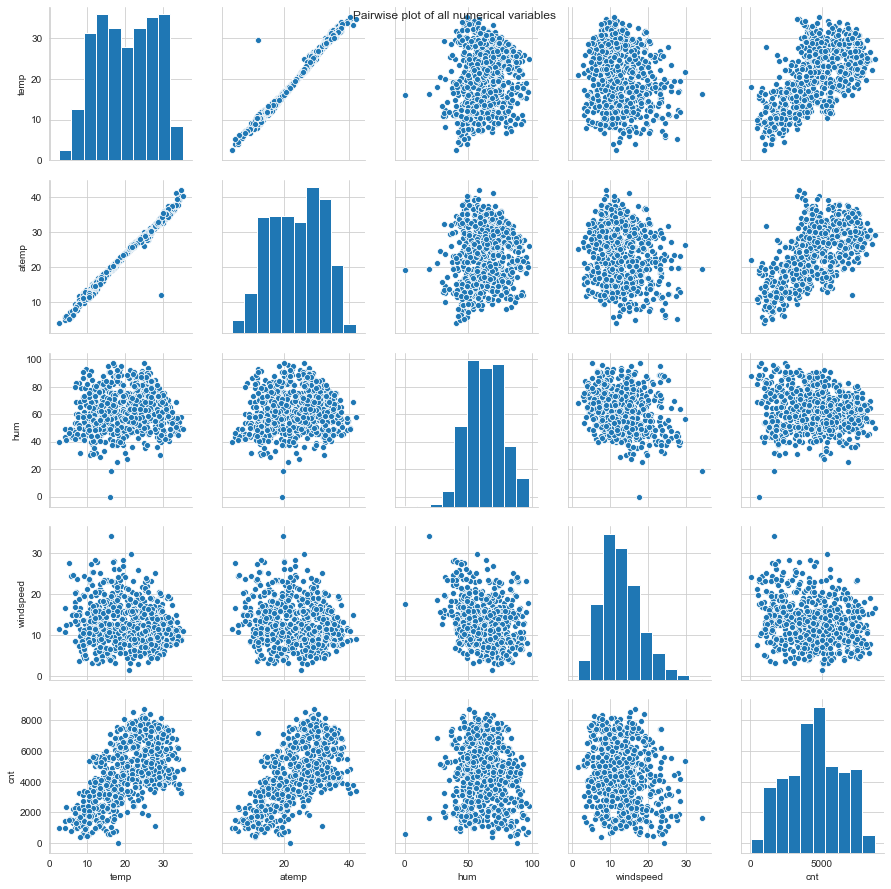

In [25]:
#Pairplot for all numerical variables
x =sns.pairplot(data=day[num_var],  palette='husl', kind = 'scatter')
x.fig.suptitle('Pairwise plot of all numerical variables')
# plt.savefig('Pairwise.png')
plt.show()

We can see that there is some corelation between Feeling Temperature and count. 

There are some categorical variables, lets make boxplot for these variables 

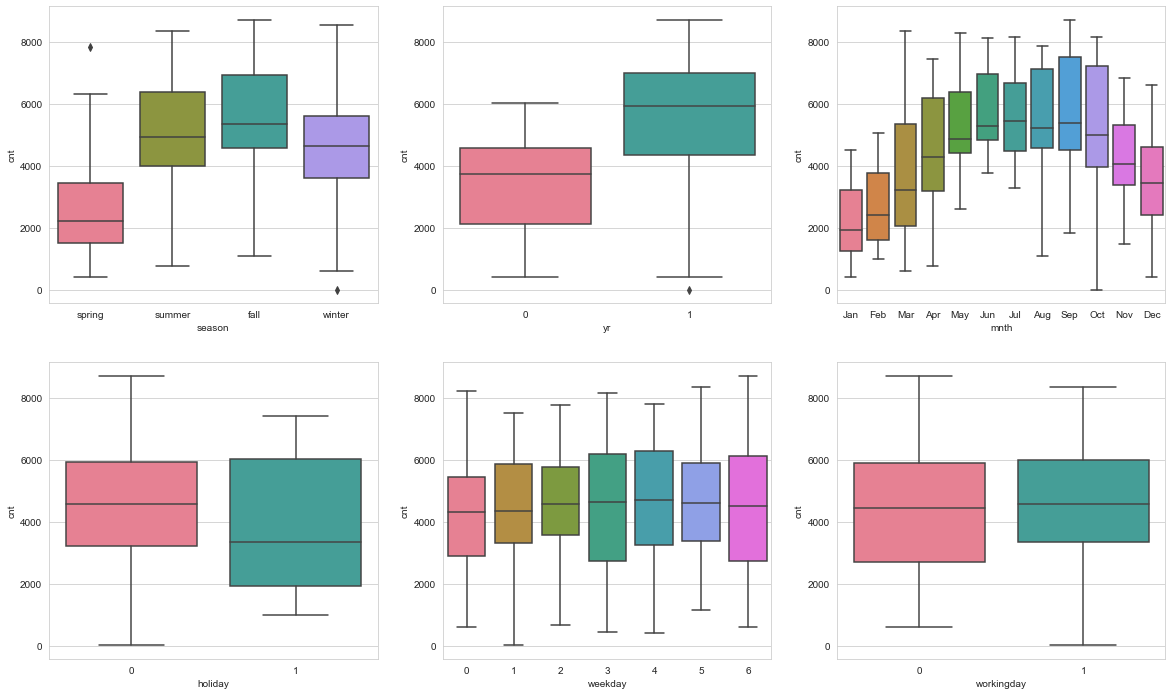

In [26]:
# Checking the distribution of count of total_rentals across different categorical variables
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=day,  palette='husl')
plt.subplot(2,3,2)
sns.boxplot(x='yr', y='cnt', data=day,  palette='husl')
plt.subplot(2,3,3)
sns.boxplot(x='mnth', y='cnt', data=day, palette='husl')
plt.subplot(2,3,4)
sns.boxplot(x='holiday', y='cnt', data=day, palette='husl')
plt.subplot(2,3,5)
sns.boxplot(x='weekday', y='cnt', data=day, palette='husl')
plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='cnt', data=day, palette='husl')

plt.show()

we can see that in summer months, the registration count goes up.

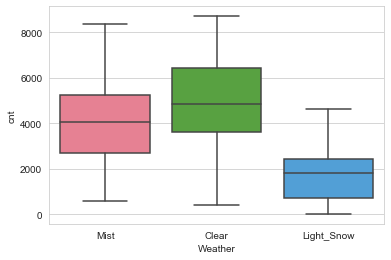

In [27]:
sns.boxplot(x='weathersit', y='cnt', data=day, palette='husl')
plt.xlabel('Weather')
plt.show()

We can also see in clear weather the count goes up.

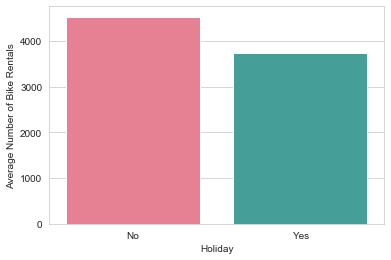

In [28]:
# Checking business on Holidays
holiday_day = day.groupby(['holiday'])['cnt'].mean().reset_index()
sns.barplot(x='holiday', y='cnt', data=holiday_day, palette='husl')
plt.xticks(np.arange(2),('No','Yes'))
plt.xlabel('Holiday')
plt.ylabel('Average Number of Bike Rentals')
plt.show()

Average number is bike rentals is more on non-holidays

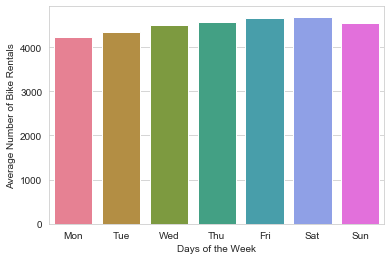

In [29]:
# Total rentals on different days of the week.
weekday_day = day.groupby(['weekday'])['cnt'].mean().reset_index()
sns.barplot(x='weekday', y='cnt', data=weekday_day, palette='husl')
plt.xticks(np.arange(7),('Mon','Tue','Wed','Thu', 'Fri', 'Sat', 'Sun'))
plt.xlabel('Days of the Week')
plt.ylabel('Average Number of Bike Rentals')
plt.show()

The average number of bike rentals is almost same throughout, but seems to be on the higher side as the weekend approaches.

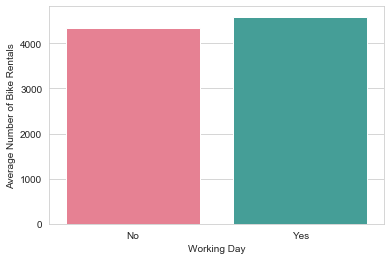

In [30]:
# Checking business on Workingdays
workingday_day = day.groupby(['workingday'])['cnt'].mean().reset_index()
sns.barplot(x='workingday', y='cnt', data=workingday_day, palette='husl')
plt.xticks(np.arange(2),('No','Yes'))
plt.xlabel('Working Day')
plt.ylabel('Average Number of Bike Rentals')
plt.show()

The average number of Bike rentals is higher in working days.

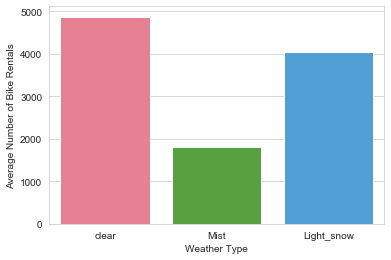

In [31]:
# Checking business according to the weather type
weathersit_day = day.groupby(['weathersit'])['cnt'].mean().reset_index()
sns.barplot(x='weathersit', y='cnt', data=weathersit_day, palette='husl')
plt.xticks(np.arange(3),('clear','Mist','Light_snow'))
plt.xlabel('Weather Type')
plt.ylabel('Average Number of Bike Rentals')
plt.show()

The average number of Bike rentals is higher in clear days

Bivariate Analysis

Now we will see at some Jointplots.
They are used for Bivariate Analysis.
Here we have plotted Scatter plot with Regression line between 2 variables along with separate Bar plots of both variables.
Also we have annotated pearson correlation coefficient and p value.

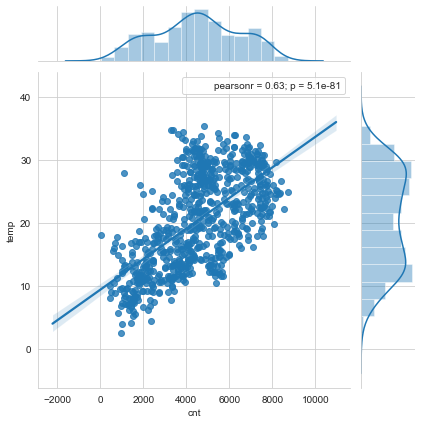

In [32]:
_ = sns.jointplot(x='cnt',y='temp',data=day,kind = 'reg')
_.annotate(stats.pearsonr)
plt.show()

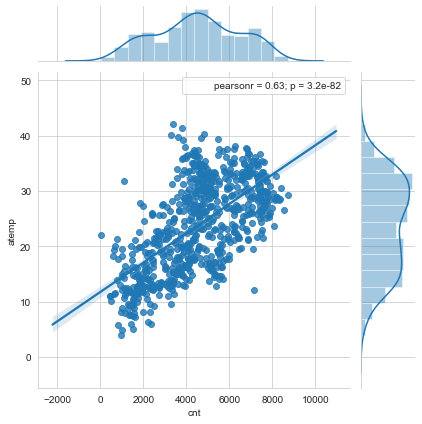

In [33]:
_ = sns.jointplot(x='cnt',y='atemp',data=day,kind = 'reg')
_.annotate(stats.pearsonr)
plt.show()

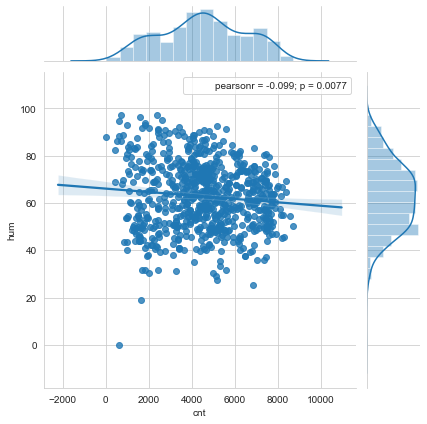

In [34]:
_ = sns.jointplot(x='cnt',y='hum',data=day,kind = 'reg')
_.annotate(stats.pearsonr)
plt.show()

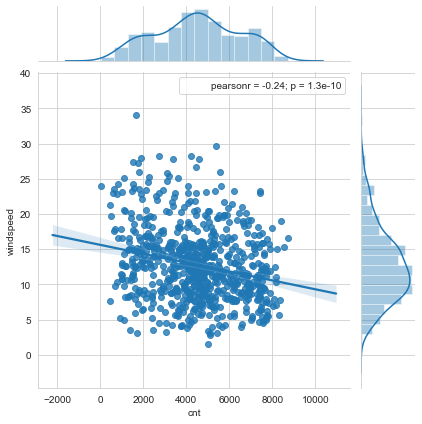

In [35]:
_ = sns.jointplot(x='cnt',y='windspeed',data=day,kind = 'reg')
_.annotate(stats.pearsonr)
plt.show()


### Outlier Analysis using Boxplot
Univariate Boxplots: Boxplots for all Numerical Variables also for target variable.

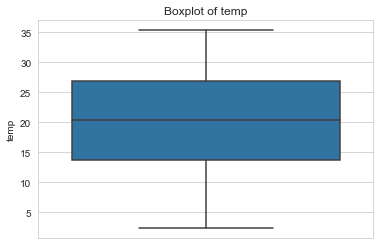

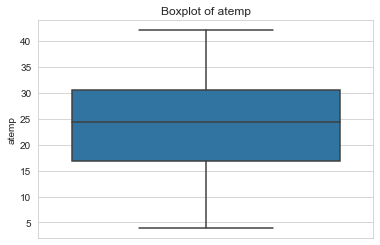

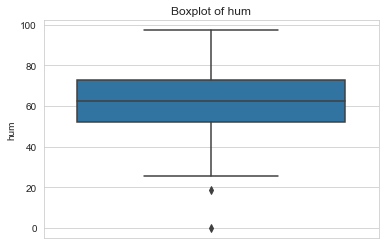

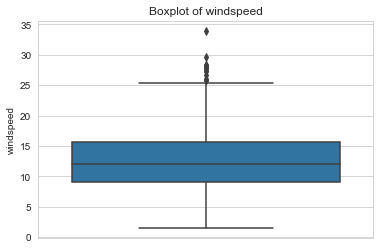

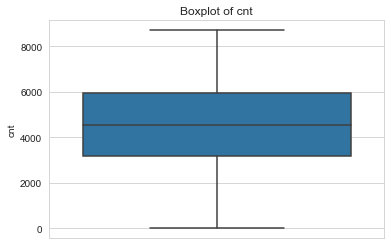

In [36]:
for i in num_var:
    sns.boxplot(y=i,data=day)
    plt.title('Boxplot of '+i)
    plt.show()

Bivariate Boxplots: Boxplots for all Numerical Variables Vs all Categorical Variables

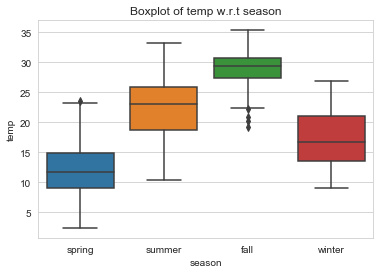

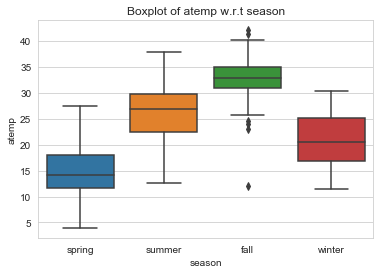

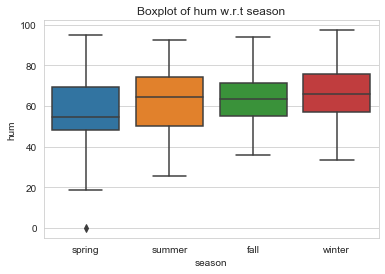

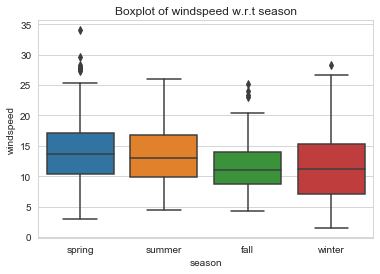

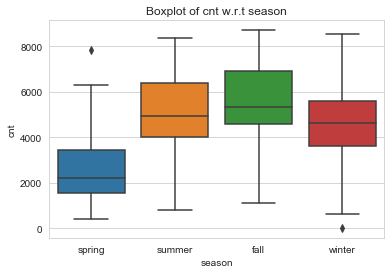

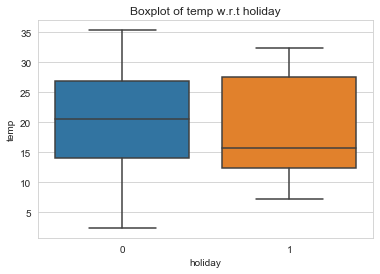

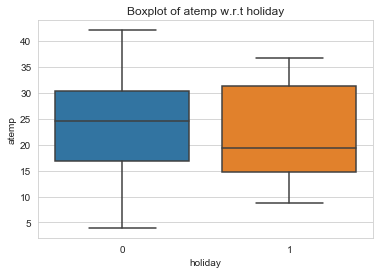

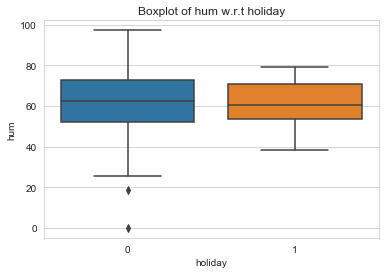

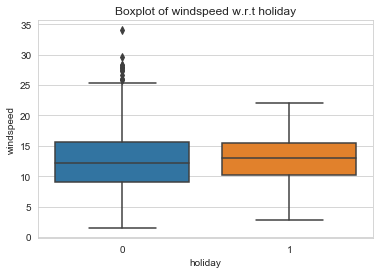

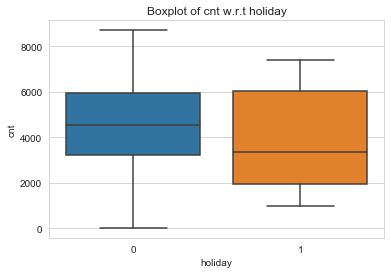

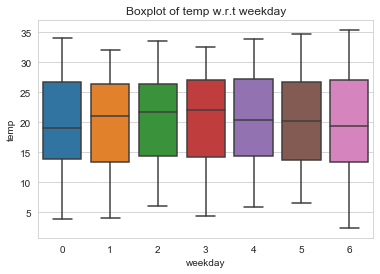

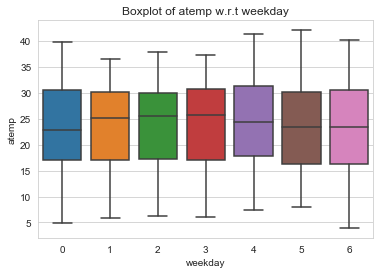

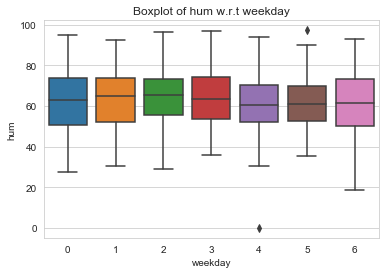

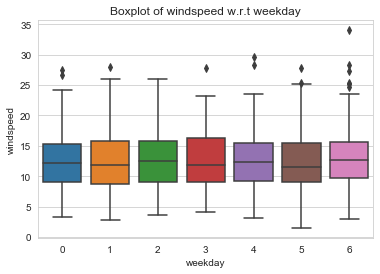

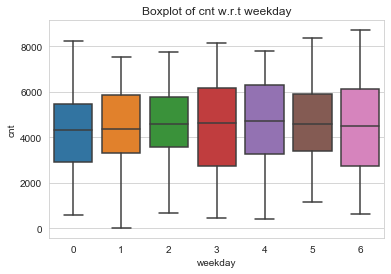

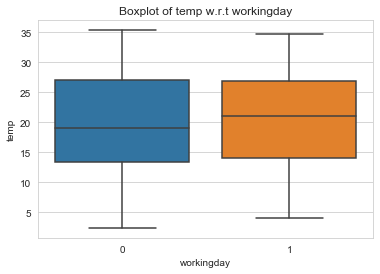

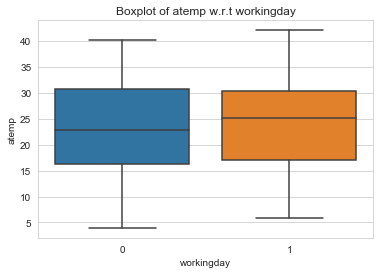

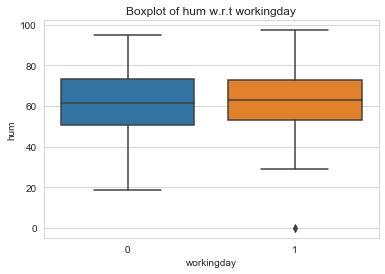

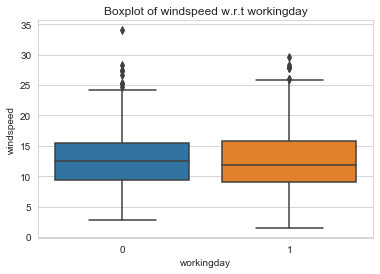

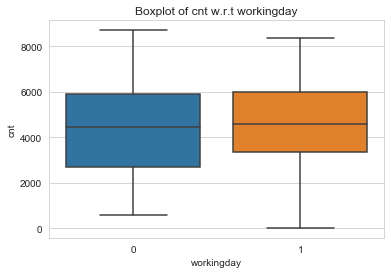

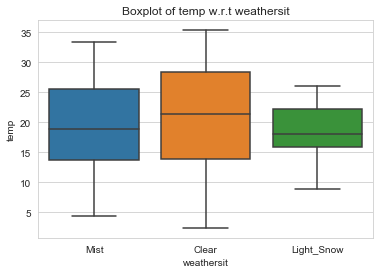

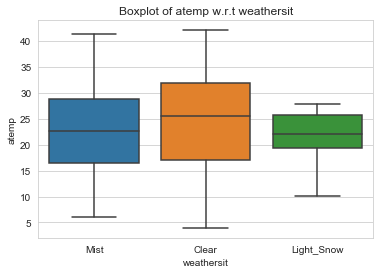

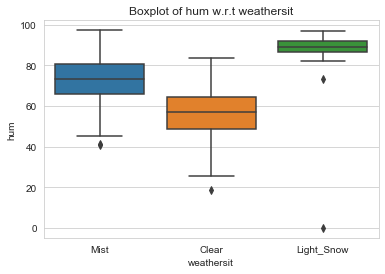

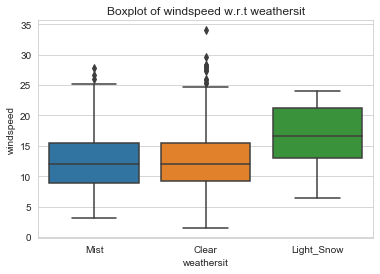

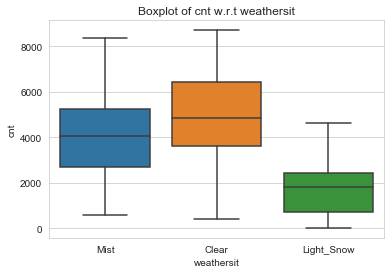

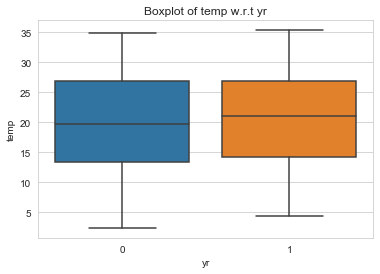

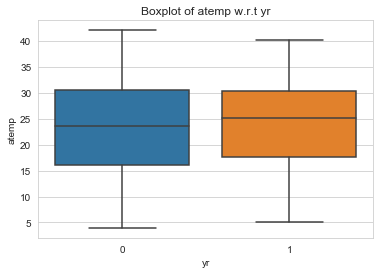

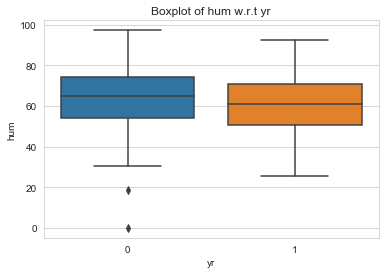

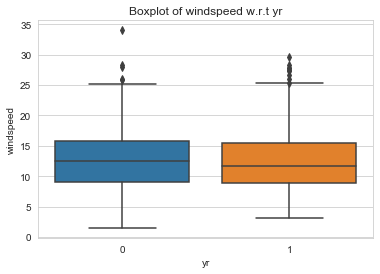

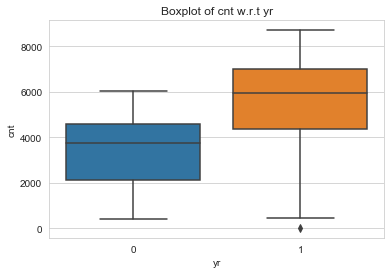

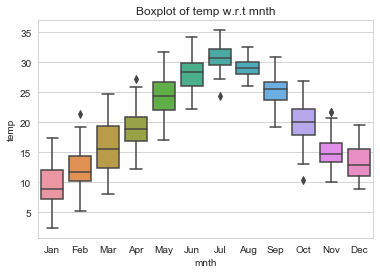

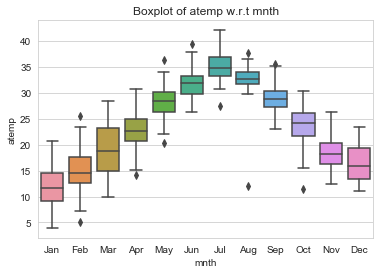

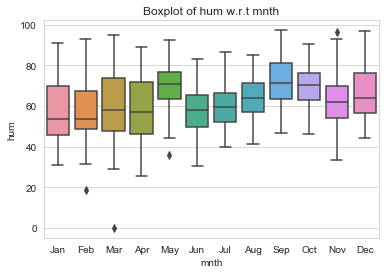

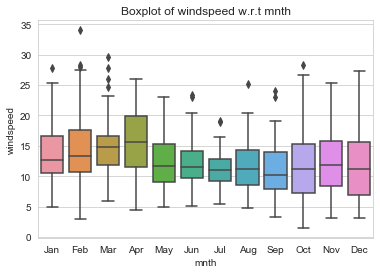

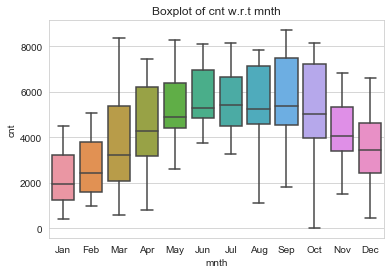

In [37]:
for a in cat_var:
    for b in num_var:
        _ = sns.boxplot(x=a,y=b,data=day)
        plt.title('Boxplot of '+b+' w.r.t '+a)
        plt.show()

### Outlier Treatment
As we can see from the above Boxplots only 'hum' and 'windspeed' columns in the dataset has outliers

In [38]:
day.std()

yr               0.500343
holiday          0.167266
workingday       0.465405
temp             7.506729
atemp            8.150308
hum             14.237589
windspeed        5.195841
cnt           1936.011647
dtype: float64

**Std Deviation before outlier treatment :**<br>
standard deviation for 'hum'= 14.237589<br>
standard deviation for 'windspeed'= 5.195841

In [39]:
def outlier_treatment(col):
    ''' calculating outlier indices and replacing them with NA  '''
    #Extract quartiles
    q75, q25 = np.percentile(day[col], [75 ,25])
    #Calculate IQR
    iqr = q75 - q25
    #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    #Replace with NA
    day.loc[day[col] < minimum,col] = np.nan
    day.loc[day[col] > maximum,col] = np.nan

In [40]:
outlier_treatment('hum')

In [41]:
day['hum'].isnull().sum()

2

In [42]:
# Filling with mean value
day['hum']=day['hum'].fillna(day['hum'].median())

In [43]:
outlier_treatment('windspeed')

In [44]:
day['windspeed'].isnull().sum()

13

In [45]:
# Filling with mean value
day['windspeed']=day['windspeed'].fillna(day['windspeed'].median())

In [46]:
day.std()

yr               0.500343
holiday          0.167266
workingday       0.465405
temp             7.506729
atemp            8.150308
hum             13.951027
windspeed        4.770736
cnt           1936.011647
dtype: float64

**Std Deviation after outlier treatment :**<br>
standard deviation for 'hum'= 13.951027<br>
standard deviation for 'windspeed'= 4.770736

### Feature Selection

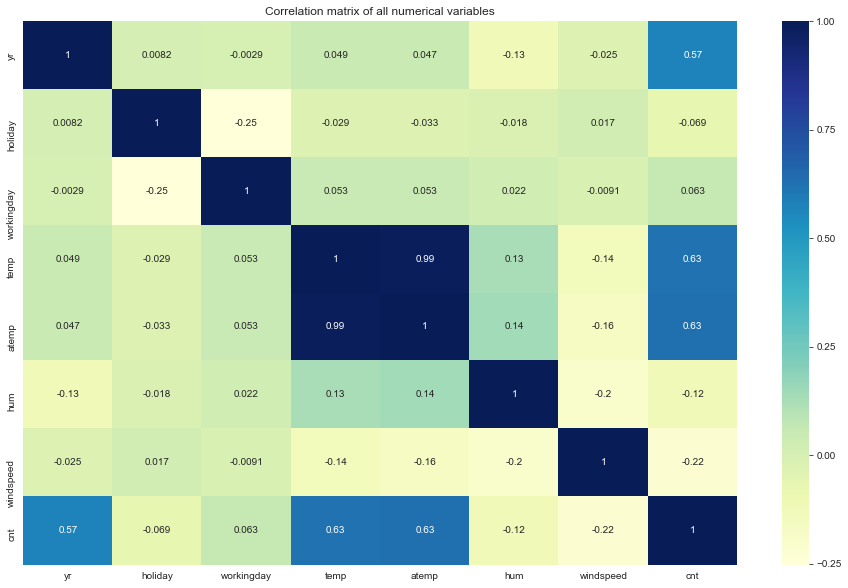

In [47]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(day.corr(), annot = True, cmap="YlGnBu")
plt.title('Correlation matrix of all numerical variables')
plt.show()

'temp' and 'atemp' are very highly correlated with each other.


## Step 3: Data Preparation

In [48]:
# Check the housing dataframe now

day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,,
1,2018-01-01,spring,0,Jan,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985
2,2018-02-01,spring,0,Jan,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801
3,2018-03-01,spring,0,Jan,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
4,2018-04-01,spring,0,Jan,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
5,2018-05-01,spring,0,Jan,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### Dummy Variable

Creating Dummy Variables for Categorical Data<br>
We need to create dummy variables for the following columns.<br>
season<br>
mnth<br>
weekday<br>
weathersit<br>

In [49]:
# Get the dummy variables for the features 'season', 'mnth', 'weekday', 'weathersit' and store it in a new variable - 'dummy'
dummy = pd.get_dummies(day[['season','mnth','weekday','weathersit']])

In [50]:
# Check what the dataset 'dummy' looks like
dummy.head()

,season_fall,season_spring,season_summer,season_winter,mnth_Apr,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Clear,weathersit_Light_Snow,weathersit_Mist
instant,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
5,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [51]:
# Let's drop the first column from dummy df using 'drop_first = True'

dummy = pd.get_dummies(day[['season','mnth','weekday','weathersit']], drop_first=True)

In [52]:
# Add the results to the original housing dataframe

day = pd.concat([day, dummy], axis = 1)     #Axis=1 is for horizontal stacking

In [53]:
# Now let's see the head of our dataframe.

day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow,weathersit_Mist
instant,,,,,,,,,,,,,,,,,,,,,
1,2018-01-01,spring,0,Jan,0,6,0,Mist,14.110847,18.18125,...,0,0,0,0,0,0,0,1,0,1
2,2018-02-01,spring,0,Jan,0,0,0,Mist,14.902598,17.68695,...,0,0,0,0,0,0,0,0,0,1
3,2018-03-01,spring,0,Jan,0,1,1,Clear,8.050924,9.47025,...,0,0,1,0,0,0,0,0,0,0
4,2018-04-01,spring,0,Jan,0,2,1,Clear,8.200000,10.60610,...,0,0,0,1,0,0,0,0,0,0
5,2018-05-01,spring,0,Jan,0,3,1,Clear,9.305237,11.46350,...,0,0,0,0,1,0,0,0,0,0


In [54]:
# Drop 'furnishingstatus' as we have created the dummies for it

day = day.drop(['season','mnth','weekday','weathersit'], axis=1)

In [55]:
day.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow,weathersit_Mist
instant,,,,,,,,,,,,,,,,,,,,,
1,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,0,0,1,0,1
2,2018-02-01,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,0,1
3,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
4,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,1,0,0,0,0,0,0
5,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,1,0,0,0,0,0


In [56]:
print('Shape of the new dataframe is:' , day.shape)

Shape of the new dataframe is: (730, 31)


In [57]:
# Since we have the month and the Year in two seperate columns, we do not need the date column anymore, thus dropping it
day.drop('dteday', inplace=True, axis = 1)

In [58]:
# Moving the cnt to the end for easier identification
first_col = day.pop('cnt')
day['cnt'] = first_col

In [59]:
pd.set_option('display.max_columns', None)
day.head(10)


,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow,weathersit_Mist,cnt
instant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,14.110847,18.18125,80.5833,10.749882,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,985
2,0,0,0,14.902598,17.68695,69.6087,16.652113,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,801
3,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1349
4,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1562
5,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1600
6,0,0,1,8.378268,11.66045,51.8261,6.000868,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1606
7,0,0,1,8.057402,10.44195,49.8696,11.304642,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1510
8,0,0,0,6.765000,8.11270,53.5833,17.875868,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,959
9,0,0,0,5.671653,5.80875,43.4167,24.250650,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,822


## Step 4: Splitting the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.

In [60]:
## Importing the required python liberaries
import sklearn
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
day_train, day_test = train_test_split(day, train_size=0.7, random_state=100)

In [61]:
print('Shape of the Train data is:' , day_train.shape)
print('Shape of the Test data is:' , day_test.shape)

Shape of the Train data is: (510, 30)
Shape of the Test data is: (220, 30)


In [62]:
# Checking the Train Data
pd.set_option('display.max_columns', None)
day_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow,weathersit_Mist,cnt
instant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
577,1,0,1,29.246653,33.1448,70.4167,11.083475,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7216
427,1,0,0,16.980847,20.6746,62.1250,10.792293,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,4066
729,1,0,0,10.489153,11.5850,48.3333,23.500518,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1796
483,1,0,0,15.443347,18.8752,48.9583,8.708325,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,4220
112,0,0,1,13.803347,16.0977,72.9583,14.707907,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1683


The dummy variables are created and we have splitted the train and test data. So now we can move ahead to scale the data.

### Rescaling the Features

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for area, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:<br>

Min-Max scaling (Normalisation)<br>
Standardisation (mean-0, sigma-1)<br>
This time, we will use MinMax scaling.

In [63]:
## Importing the required python liberaries
from sklearn.preprocessing import MinMaxScaler

Let us check variance for each column in dataset before Normalisation
High variance will affect the accuracy of the model. 

In [64]:
day[num_var].var()

temp         5.635098e+01
atemp        6.642752e+01
hum          1.946312e+02
windspeed    2.275992e+01
cnt          3.748141e+06
dtype: float64

In [65]:
# We do a MinMax scaling
scaler = MinMaxScaler() #Instantiating the object

In [66]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
day_train[num_var] = scaler.fit_transform(day_train[num_var])

In [67]:
day_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow,weathersit_Mist,cnt
instant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
577,1,0,1,0.815169,0.766351,0.616677,0.366645,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.827658
427,1,0,0,0.442393,0.438975,0.497301,0.353703,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0.465255
729,1,0,0,0.245101,0.200348,0.298740,0.918542,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.204096
483,1,0,0,0.395666,0.391735,0.307738,0.261077,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.482973
112,0,0,1,0.345824,0.318819,0.653269,0.527739,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.191095


In [68]:
day_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow,weathersit_Mist,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.514689,0.429193,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.029412,0.345098,0.513499
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.197707,0.212607,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.169124,0.475867,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.357679,0.275905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.356420
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.516197,0.405570,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.657469,0.561104,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


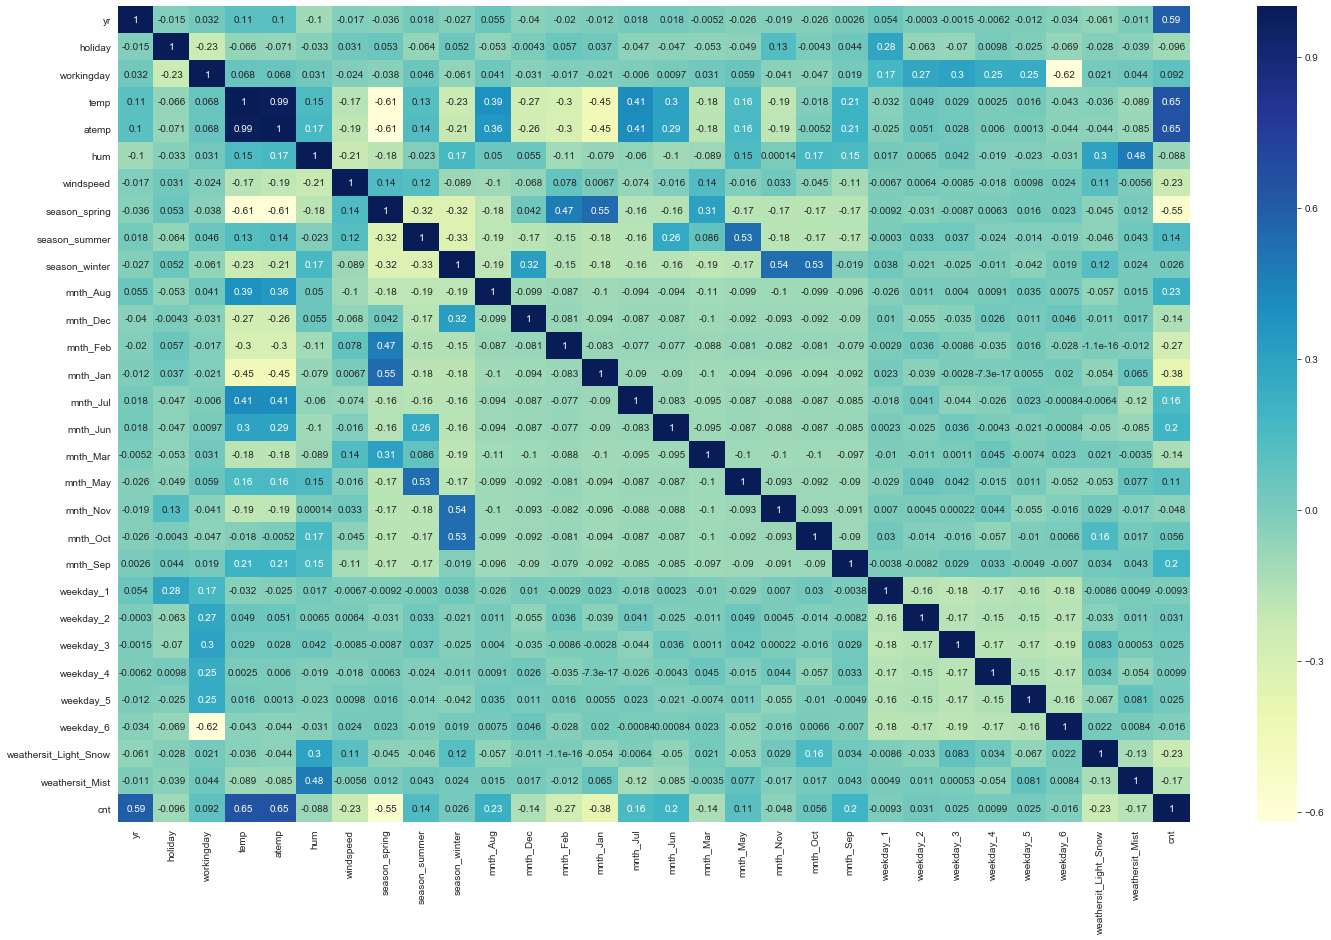

In [69]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (24, 15))
sns.heatmap(day_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you have noticed that cnt has strong colinearity with yr, temp, atemp.<br>
But, temp and atemp have almost a perfect colinearity, so both cannot be part of the model. We keep this in mind while building the model in the following cells.

Let's see a pairplot between temp, yr and cnt

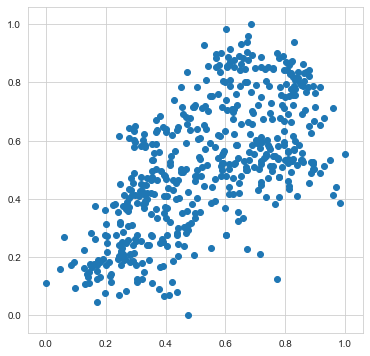

In [70]:
plt.figure(figsize=[6,6])
plt.scatter(day_train.temp, day_train.cnt)
plt.show()

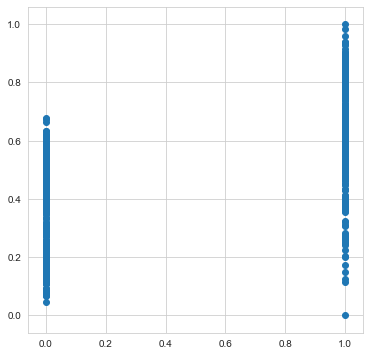

In [71]:
plt.figure(figsize=[6,6])
plt.scatter(day_train.yr, day_train.cnt)
plt.show()

In [72]:
#Normalisation
for i in num_var:
    print(i)
    day[i] = (day[i] - min(day[i]))/(max(day[i]) - min(day[i]))

temp
atemp
hum
windspeed
cnt


Let us check variance for each column in dataset after Normalisation

In [73]:
day[num_var].var()

temp         0.052048
atemp        0.045782
hum          0.037719
windspeed    0.040069
cnt          0.049611
dtype: float64

### Dividing into X and Y sets for the model building

In [74]:
y_train = day_train.pop('cnt')
X_train = day_train

## Step 5: Building a linear model

Since the number of columns is 29, which is manageable, we first build a model with all the columns, and then keep removing the columns based upon Statistical Significance and Co-Linearity.<br>
We will stop when we notice that there is no further improvement in the R2 value or all variables are statistically significant with low VIF.<br>

There wil be several iterations before getting the perfect model, so lets start build the first model.

In [75]:
## Importing the required python liberaries
import statsmodels.api as sm

#### Adding all the variables to the model

In [76]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm)
lr_model1 = lr.fit()


In [77]:
lr_model1.params

const                    0.230994
yr                       0.231271
holiday                 -0.037784
workingday               0.043637
temp                     0.318397
atemp                    0.128709
hum                     -0.107827
windspeed               -0.113337
season_spring           -0.047864
season_summer            0.037953
season_winter            0.111340
mnth_Aug                 0.028783
mnth_Dec                -0.046372
mnth_Feb                -0.036679
mnth_Jan                -0.061081
mnth_Jul                -0.026921
mnth_Jun                 0.013721
mnth_Mar                 0.003483
mnth_May                 0.032802
mnth_Nov                -0.043193
mnth_Oct                 0.000909
mnth_Sep                 0.090276
weekday_1               -0.010497
weekday_2               -0.006088
weekday_3                0.006322
weekday_4                0.002068
weekday_5                0.014048
weekday_6                0.052720
weathersit_Light_Snow   -0.246612
weathersit_Mis

In [78]:
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     95.27
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.40e-176
Time:                        15:10:57   Log-Likelihood:                 518.01
No. Observations:                 510   AIC:                            -978.0
Df Residuals:                     481   BIC:                            -855.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2310      0.043      5.389      0.000       0.147       0.315
yr                        0.2313      0.008     28.009      0.000       0.215       0.247
holiday                  -0.0378      0.024     -1.567      0.118      -0.085       0.010
workingday                0.0436      0.010      4.570      0.000       0.025       0.062
temp                      0.3184      0.144      2.212      0.027       0.036       0.601
atemp                     0.1287      0.141      0.916      0.360      -0.147       0.405
hum                      -0.1078      0.030     -3.577      0.000      -0.167      -0.049
windspeed                -0.1133      0.021     -5.378      0.000      -0.155      -0.072
season_spring            -0.0479      0.031     -1.566      0.118      -0.108       0.012
season_summer             0.0380      0.027      1.424      0.155      -0.014       0.090
season_winter             0.1113      0.029      3.905      0.000       0.055       0.167
mnth_Aug                  0.0288      0.034      0.836      0.404      -0.039       0.096
mnth_Dec                 -0.0464      0.034     -1.352      0.177      -0.114       0.021
mnth_Feb                 -0.0367      0.034     -1.089      0.277      -0.103       0.029
mnth_Jan                 -0.0611      0.034     -1.782      0.075      -0.128       0.006
mnth_Jul                 -0.0269      0.036     -0.755      0.451      -0.097       0.043
mnth_Jun                  0.0137      0.025      0.541      0.589      -0.036       0.064
mnth_Mar                  0.0035      0.025      0.139      0.890      -0.046       0.053
mnth_May                  0.0328      0.021      1.526      0.128      -0.009       0.075
mnth_Nov                 -0.0432      0.037     -1.166      0.244      -0.116       0.030
mnth_Oct                  0.0009      0.037      0.025      0.980      -0.071       0.073
mnth_Sep                  0.0903      0.033      2.771      0.006       0.026       0.154
weekday_1                -0.0105      0.010     -1.059      0.290      -0.030       0.009
weekday_2                -0.0061      0.011     -0.535      0.593      -0.028       0.016
weekday_3                 0.0063      0.011      0.590      0.556      -0.015       0.027
weekday_4                 0.0021      0.011      0.186      0.853      -0.020       0.024
weekday_5                 0.0140      0.011      1.229      0.220      -0.008       0.037
weekday_6                 0.0527      0.015      3.563      0.000       0.024       0.082
weathersit_Light_Snow    -0.2466      0.028     -8.739      0.000      -0.302      -0.191
weathersit_Mist          -0.0582      0.011     -5.338      0.000      -0.080      -0.037
==============================================================================
Omnibus:                       84.

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [79]:
## Importing the required python liberaries
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,weekday_3,inf
24,weekday_4,inf
2,workingday,inf
1,holiday,inf
25,weekday_5,inf
21,weekday_1,inf
22,weekday_2,inf
3,temp,428.90
4,atemp,381.20
5,hum,17.06


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.



The R-squared is a significant 84.7%, but there are insignificant variables and variables with strong multicollinearity. We need to get rid of them and will do it step by step. We will follow the same process in an iterative manner till we build a robust model. First we will remove all columns with High P Values and then when the P Values are acceptable for all the columns, we will check their VIF and remove them.

#### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is mnth_Oct, as it has a very high p-value of 0.98. Let's go ahead and drop this variable.

In [81]:
# Dropping highly correlated variables and insignificant variables
# Removing 'mnth_Oct' due to high P-Value

X = X_train.drop('mnth_Oct' ,axis=1)

In [82]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm)
lr_model2 = lr.fit()

In [83]:
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     99.01
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.40e-177
Time:                        15:11:05   Log-Likelihood:                 518.01
No. Observations:                 510   AIC:                            -980.0
Df Residuals:                     482   BIC:                            -861.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2314      0.039      5.881      0.000       0.154       0.309
yr                        0.2313      0.008     28.061      0.000       0.215       0.247
holiday                  -0.0378      0.024     -1.570      0.117      -0.085       0.010
workingday                0.0436      0.010      4.577      0.000       0.025       0.062
temp                      0.3184      0.144      2.214      0.027       0.036       0.601
atemp                     0.1286      0.140      0.917      0.360      -0.147       0.404
hum                      -0.1077      0.030     -3.598      0.000      -0.167      -0.049
windspeed                -0.1134      0.021     -5.386      0.000      -0.155      -0.072
season_spring            -0.0479      0.031     -1.567      0.118      -0.108       0.012
season_summer             0.0377      0.024      1.556      0.120      -0.010       0.085
season_winter             0.1117      0.025      4.489      0.000       0.063       0.161
mnth_Aug                  0.0284      0.030      0.942      0.346      -0.031       0.088
mnth_Dec                 -0.0470      0.021     -2.260      0.024      -0.088      -0.006
mnth_Feb                 -0.0371      0.029     -1.285      0.199      -0.094       0.020
mnth_Jan                 -0.0615      0.029     -2.089      0.037      -0.119      -0.004
mnth_Jul                 -0.0273      0.032     -0.864      0.388      -0.089       0.035
mnth_Jun                  0.0135      0.024      0.572      0.567      -0.033       0.060
mnth_Mar                  0.0032      0.021      0.148      0.883      -0.039       0.045
mnth_May                  0.0327      0.021      1.583      0.114      -0.008       0.073
mnth_Nov                 -0.0440      0.020     -2.215      0.027      -0.083      -0.005
mnth_Sep                  0.0898      0.025      3.521      0.000       0.040       0.140
weekday_1                -0.0105      0.010     -1.060      0.290      -0.030       0.009
weekday_2                -0.0061      0.011     -0.536      0.592      -0.028       0.016
weekday_3                 0.0063      0.011      0.591      0.555      -0.015       0.027
weekday_4                 0.0021      0.011      0.187      0.852      -0.020       0.024
weekday_5                 0.0141      0.011      1.231      0.219      -0.008       0.036
weekday_6                 0.0527      0.015      3.567      0.000       0.024       0.082
weathersit_Light_Snow    -0.2466      0.028     -8.750      0.000      -0.302      -0.191
weathersit_Mist          -0.0582      0.011     -5.345      0.000      -0.080      -0.037
==============================================================================
Omnibus:                       84.472   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarqu

#### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is mnth_Mar, as it has a very high p-value of 0.883. Let's go ahead and drop this variable.

In [84]:
# Dropping highly correlated variables and insignificant variables
# Removing 'mnth_Mar' due to high P-Value

X = X.drop('mnth_Mar' ,axis=1)

In [85]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm)
lr_model3 = lr.fit()

In [86]:
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     103.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.37e-178
Time:                        15:11:13   Log-Likelihood:                 518.00
No. Observations:                 510   AIC:                            -982.0
Df Residuals:                     483   BIC:                            -867.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2328      0.038      6.085      0.000       0.158       0.308
yr                        0.2313      0.008     28.099      0.000       0.215       0.247
holiday                  -0.0379      0.024     -1.577      0.116      -0.085       0.009
workingday                0.0437      0.009      4.609      0.000       0.025       0.062
temp                      0.3176      0.144      2.213      0.027       0.036       0.600
atemp                     0.1282      0.140      0.914      0.361      -0.147       0.404
hum                      -0.1076      0.030     -3.599      0.000      -0.166      -0.049
windspeed                -0.1135      0.021     -5.408      0.000      -0.155      -0.072
season_spring            -0.0462      0.028     -1.631      0.104      -0.102       0.009
season_summer             0.0378      0.024      1.563      0.119      -0.010       0.085
season_winter             0.1113      0.025      4.500      0.000       0.063       0.160
mnth_Aug                  0.0279      0.030      0.933      0.351      -0.031       0.087
mnth_Dec                 -0.0484      0.019     -2.575      0.010      -0.085      -0.011
mnth_Feb                 -0.0398      0.022     -1.799      0.073      -0.083       0.004
mnth_Jan                 -0.0644      0.022     -2.899      0.004      -0.108      -0.021
mnth_Jul                 -0.0277      0.031     -0.881      0.379      -0.090       0.034
mnth_Jun                  0.0129      0.023      0.556      0.578      -0.033       0.059
mnth_May                  0.0319      0.020      1.600      0.110      -0.007       0.071
mnth_Nov                 -0.0446      0.019     -2.297      0.022      -0.083      -0.006
mnth_Sep                  0.0892      0.025      3.541      0.000       0.040       0.139
weekday_1                -0.0105      0.010     -1.060      0.290      -0.030       0.009
weekday_2                -0.0061      0.011     -0.537      0.591      -0.028       0.016
weekday_3                 0.0063      0.011      0.590      0.555      -0.015       0.027
weekday_4                 0.0021      0.011      0.193      0.847      -0.020       0.024
weekday_5                 0.0140      0.011      1.229      0.220      -0.008       0.036
weekday_6                 0.0528      0.015      3.580      0.000       0.024       0.082
weathersit_Light_Snow    -0.2467      0.028     -8.765      0.000      -0.302      -0.191
weathersit_Mist          -0.0583      0.011     -5.353      0.000      -0.080      -0.037
==============================================================================
Omnibus:                       84.785   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.062
Skew:                          -0.818   Prob(JB):       

#### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is weekday_4, as it has a very high p-value of 0.847. Let's go ahead and drop this variable.

In [87]:
# Dropping highly correlated variables and insignificant variables
# Removing 'weekday_4' due to high P-Value

X = X.drop('weekday_4' ,axis=1)

In [88]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm)
lr_model4 = lr.fit()

In [89]:
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     103.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.37e-178
Time:                        15:11:20   Log-Likelihood:                 518.00
No. Observations:                 510   AIC:                            -982.0
Df Residuals:                     483   BIC:                            -867.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2328      0.038      6.085      0.000       0.158       0.308
yr                        0.2313      0.008     28.099      0.000       0.215       0.247
holiday                  -0.0357      0.031     -1.171      0.242      -0.096       0.024
workingday                0.0459      0.015      2.988      0.003       0.016       0.076
temp                      0.3176      0.144      2.213      0.027       0.036       0.600
atemp                     0.1282      0.140      0.914      0.361      -0.147       0.404
hum                      -0.1076      0.030     -3.599      0.000      -0.166      -0.049
windspeed                -0.1135      0.021     -5.408      0.000      -0.155      -0.072
season_spring            -0.0462      0.028     -1.631      0.104      -0.102       0.009
season_summer             0.0378      0.024      1.563      0.119      -0.010       0.085
season_winter             0.1113      0.025      4.500      0.000       0.063       0.160
mnth_Aug                  0.0279      0.030      0.933      0.351      -0.031       0.087
mnth_Dec                 -0.0484      0.019     -2.575      0.010      -0.085      -0.011
mnth_Feb                 -0.0398      0.022     -1.799      0.073      -0.083       0.004
mnth_Jan                 -0.0644      0.022     -2.899      0.004      -0.108      -0.021
mnth_Jul                 -0.0277      0.031     -0.881      0.379      -0.090       0.034
mnth_Jun                  0.0129      0.023      0.556      0.578      -0.033       0.059
mnth_May                  0.0319      0.020      1.600      0.110      -0.007       0.071
mnth_Nov                 -0.0446      0.019     -2.297      0.022      -0.083      -0.006
mnth_Sep                  0.0892      0.025      3.541      0.000       0.040       0.139
weekday_1                -0.0126      0.015     -0.821      0.412      -0.043       0.018
weekday_2                -0.0082      0.016     -0.526      0.599      -0.039       0.023
weekday_3                 0.0042      0.015      0.280      0.780      -0.025       0.033
weekday_5                 0.0119      0.016      0.750      0.454      -0.019       0.043
weekday_6                 0.0528      0.015      3.580      0.000       0.024       0.082
weathersit_Light_Snow    -0.2467      0.028     -8.765      0.000      -0.302      -0.191
weathersit_Mist          -0.0583      0.011     -5.353      0.000      -0.080      -0.037
==============================================================================
Omnibus:                       84.785   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.062
Skew:                          -0.818   Prob(JB):                     3.00e-50
Kurtosis:                       5.838   Cond. No.                  

#### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is weekday_3, as it has a very high p-value of 0.78. Let's go ahead and drop this variable.

In [90]:
# Dropping highly correlated variables and insignificant variables
# Removing 'weekday_3' due to high P-Value

X = X.drop('weekday_3' ,axis=1)

In [91]:
# Build a fifth fitted model
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm)
lr_model5 = lr.fit()

In [92]:
lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     107.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.36e-179
Time:                        15:11:27   Log-Likelihood:                 517.96
No. Observations:                 510   AIC:                            -983.9
Df Residuals:                     484   BIC:                            -873.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2324      0.038      6.085      0.000       0.157       0.307
yr                        0.2313      0.008     28.127      0.000       0.215       0.247
holiday                  -0.0338      0.030     -1.138      0.256      -0.092       0.025
workingday                0.0482      0.013      3.699      0.000       0.023       0.074
temp                      0.3187      0.143      2.223      0.027       0.037       0.600
atemp                     0.1271      0.140      0.908      0.364      -0.148       0.402
hum                      -0.1075      0.030     -3.600      0.000      -0.166      -0.049
windspeed                -0.1135      0.021     -5.412      0.000      -0.155      -0.072
season_spring            -0.0460      0.028     -1.626      0.105      -0.102       0.010
season_summer             0.0380      0.024      1.575      0.116      -0.009       0.085
season_winter             0.1116      0.025      4.520      0.000       0.063       0.160
mnth_Aug                  0.0280      0.030      0.940      0.348      -0.031       0.087
mnth_Dec                 -0.0485      0.019     -2.588      0.010      -0.085      -0.012
mnth_Feb                 -0.0397      0.022     -1.795      0.073      -0.083       0.004
mnth_Jan                 -0.0643      0.022     -2.899      0.004      -0.108      -0.021
mnth_Jul                 -0.0276      0.031     -0.876      0.381      -0.089       0.034
mnth_Jun                  0.0131      0.023      0.564      0.573      -0.032       0.059
mnth_May                  0.0320      0.020      1.608      0.109      -0.007       0.071
mnth_Nov                 -0.0447      0.019     -2.308      0.021      -0.083      -0.007
mnth_Sep                  0.0893      0.025      3.550      0.000       0.040       0.139
weekday_1                -0.0149      0.013     -1.131      0.259      -0.041       0.011
weekday_2                -0.0105      0.013     -0.787      0.431      -0.037       0.016
weekday_5                 0.0096      0.014      0.707      0.480      -0.017       0.036
weekday_6                 0.0528      0.015      3.583      0.000       0.024       0.082
weathersit_Light_Snow    -0.2465      0.028     -8.769      0.000      -0.302      -0.191
weathersit_Mist          -0.0582      0.011     -5.353      0.000      -0.080      -0.037
==============================================================================
Omnibus:                       85.153   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.511
Skew:                          -0.821   Prob(JB):                     1.45e-50
Kurtosis:                       5.847   Cond. No.                         89.6
==============================================================================

In [93]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,426.09
4,atemp,380.70
5,hum,16.47
7,season_spring,7.37
2,workingday,6.87
9,season_winter,6.19
6,windspeed,5.74
8,season_summer,5.50
10,mnth_Aug,4.92
14,mnth_Jul,4.47


#### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is mnth_Jun, as it has a very high p-value of 0.573. Let's go ahead and drop this variable.

In [94]:
X.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_May,mnth_Nov,mnth_Sep,weekday_1,weekday_2,weekday_5,weekday_6,weathersit_Light_Snow,weathersit_Mist
instant,,,,,,,,,,,,,,,,,,,,,,,,,
577,1,0,1,0.815169,0.766351,0.616677,0.366645,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
427,1,0,0,0.442393,0.438975,0.497301,0.353703,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
729,1,0,0,0.245101,0.200348,0.298740,0.918542,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
483,1,0,0,0.395666,0.391735,0.307738,0.261077,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
112,0,0,1,0.345824,0.318819,0.653269,0.527739,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [95]:
# Dropping highly correlated variables and insignificant variables
# Removing 'mnth_Jun' due to high P-Value

X = X.drop('mnth_Jun' ,axis=1)

In [96]:
# Build a 6th fitted model
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm)
lr_model6 = lr.fit()

In [97]:
lr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     112.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.49e-180
Time:                        15:11:35   Log-Likelihood:                 517.79
No. Observations:                 510   AIC:                            -985.6
Df Residuals:                     485   BIC:                            -879.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2326      0.038      6.095      0.000       0.158       0.308
yr                        0.2308      0.008     28.226      0.000       0.215       0.247
holiday                  -0.0352      0.030     -1.190      0.235      -0.093       0.023
workingday                0.0480      0.013      3.689      0.000       0.022       0.074
temp                      0.3420      0.137      2.494      0.013       0.073       0.612
atemp                     0.1174      0.139      0.846      0.398      -0.155       0.390
hum                      -0.1097      0.030     -3.709      0.000      -0.168      -0.052
windspeed                -0.1146      0.021     -5.491      0.000      -0.156      -0.074
season_spring            -0.0502      0.027     -1.843      0.066      -0.104       0.003
season_summer             0.0358      0.024      1.504      0.133      -0.011       0.083
season_winter             0.1070      0.023      4.597      0.000       0.061       0.153
mnth_Aug                  0.0181      0.024      0.752      0.453      -0.029       0.066
mnth_Dec                 -0.0470      0.019     -2.536      0.012      -0.083      -0.011
mnth_Feb                 -0.0379      0.022     -1.733      0.084      -0.081       0.005
mnth_Jan                 -0.0616      0.022     -2.846      0.005      -0.104      -0.019
mnth_Jul                 -0.0382      0.025     -1.522      0.129      -0.088       0.011
mnth_May                  0.0268      0.018      1.519      0.129      -0.008       0.062
mnth_Nov                 -0.0438      0.019     -2.271      0.024      -0.082      -0.006
mnth_Sep                  0.0823      0.022      3.765      0.000       0.039       0.125
weekday_1                -0.0147      0.013     -1.118      0.264      -0.040       0.011
weekday_2                -0.0107      0.013     -0.798      0.425      -0.037       0.016
weekday_5                 0.0094      0.014      0.696      0.487      -0.017       0.036
weekday_6                 0.0529      0.015      3.589      0.000       0.024       0.082
weathersit_Light_Snow    -0.2463      0.028     -8.769      0.000      -0.302      -0.191
weathersit_Mist          -0.0578      0.011     -5.332      0.000      -0.079      -0.037
==============================================================================
Omnibus:                       84.216   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.038
Skew:                          -0.820   Prob(JB):                     6.10e-49
Kurtosis:                       5.786   Cond. No.                         87.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correct

#### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is weekday_5, as it has a very high p-value of 0.487. Let's go ahead and drop this variable.

In [98]:
# Dropping highly correlated variables and insignificant variables
# Removing 'weekday_5' due to high P-Value

X = X.drop('weekday_5' ,axis=1)

In [99]:
# Build a 7th fitted model
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm)
lr_model7 = lr.fit()

In [100]:
lr_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     116.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.73e-181
Time:                        15:11:38   Log-Likelihood:                 517.53
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     486   BIC:                            -885.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2330      0.038      6.110      0.000       0.158       0.308
yr                        0.2308      0.008     28.234      0.000       0.215       0.247
holiday                  -0.0321      0.029     -1.099      0.272      -0.090       0.025
workingday                0.0509      0.012      4.127      0.000       0.027       0.075
temp                      0.3486      0.137      2.549      0.011       0.080       0.617
atemp                     0.1099      0.138      0.795      0.427      -0.162       0.382
hum                      -0.1103      0.030     -3.732      0.000      -0.168      -0.052
windspeed                -0.1145      0.021     -5.487      0.000      -0.155      -0.073
season_spring            -0.0504      0.027     -1.849      0.065      -0.104       0.003
season_summer             0.0357      0.024      1.500      0.134      -0.011       0.082
season_winter             0.1074      0.023      4.616      0.000       0.062       0.153
mnth_Aug                  0.0183      0.024      0.760      0.448      -0.029       0.066
mnth_Dec                 -0.0471      0.019     -2.543      0.011      -0.084      -0.011
mnth_Feb                 -0.0377      0.022     -1.723      0.086      -0.081       0.005
mnth_Jan                 -0.0617      0.022     -2.853      0.005      -0.104      -0.019
mnth_Jul                 -0.0376      0.025     -1.499      0.135      -0.087       0.012
mnth_May                  0.0270      0.018      1.528      0.127      -0.008       0.062
mnth_Nov                 -0.0447      0.019     -2.322      0.021      -0.083      -0.007
mnth_Sep                  0.0821      0.022      3.758      0.000       0.039       0.125
weekday_1                -0.0175      0.012     -1.410      0.159      -0.042       0.007
weekday_2                -0.0136      0.013     -1.070      0.285      -0.038       0.011
weekday_6                 0.0528      0.015      3.590      0.000       0.024       0.082
weathersit_Light_Snow    -0.2477      0.028     -8.842      0.000      -0.303      -0.193
weathersit_Mist          -0.0572      0.011     -5.297      0.000      -0.078      -0.036
==============================================================================
Omnibus:                       83.638   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.822
Skew:                          -0.814   Prob(JB):                     1.12e-48
Kurtosis:                       5.782   Cond. No.                         87.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is mnth_Aug, as it has a very high p-value of 0.448. Let's go ahead and drop this variable.

In [101]:
# Dropping highly correlated variables and insignificant variables
# Removing 'mnth_Aug' due to high P-Value

X = X.drop('mnth_Aug' ,axis=1)

In [102]:
# Build a 8th fitted model
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm)
lr_model8 = lr.fit()

In [103]:
lr_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     122.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.06e-182
Time:                        15:11:41   Log-Likelihood:                 517.23
No. Observations:                 510   AIC:                            -988.5
Df Residuals:                     487   BIC:                            -891.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2434      0.036      6.837      0.000       0.173       0.313
yr                        0.2310      0.008     28.283      0.000       0.215       0.247
holiday                  -0.0324      0.029     -1.109      0.268      -0.090       0.025
workingday                0.0510      0.012      4.140      0.000       0.027       0.075
temp                      0.3585      0.136      2.634      0.009       0.091       0.626
atemp                     0.1017      0.138      0.738      0.461      -0.169       0.372
hum                      -0.1090      0.029     -3.696      0.000      -0.167      -0.051
windspeed                -0.1148      0.021     -5.505      0.000      -0.156      -0.074
season_spring            -0.0620      0.023     -2.749      0.006      -0.106      -0.018
season_summer             0.0235      0.018      1.339      0.181      -0.011       0.058
season_winter             0.0967      0.019      5.224      0.000       0.060       0.133
mnth_Dec                 -0.0480      0.018     -2.598      0.010      -0.084      -0.012
mnth_Feb                 -0.0377      0.022     -1.725      0.085      -0.081       0.005
mnth_Jan                 -0.0617      0.022     -2.854      0.004      -0.104      -0.019
mnth_Jul                 -0.0505      0.018     -2.751      0.006      -0.087      -0.014
mnth_May                  0.0265      0.018      1.504      0.133      -0.008       0.061
mnth_Nov                 -0.0459      0.019     -2.391      0.017      -0.084      -0.008
mnth_Sep                  0.0717      0.017      4.217      0.000       0.038       0.105
weekday_1                -0.0176      0.012     -1.415      0.158      -0.042       0.007
weekday_2                -0.0133      0.013     -1.053      0.293      -0.038       0.012
weekday_6                 0.0534      0.015      3.632      0.000       0.025       0.082
weathersit_Light_Snow    -0.2490      0.028     -8.908      0.000      -0.304      -0.194
weathersit_Mist          -0.0570      0.011     -5.281      0.000      -0.078      -0.036
==============================================================================
Omnibus:                       84.768   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.348
Skew:                          -0.825   Prob(JB):                     3.17e-49
Kurtosis:                       5.790   Cond. No.                         86.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,374.54
4,atemp,370.15
5,hum,15.87
2,workingday,6.04
6,windspeed,5.63
7,season_spring,5.14
9,season_winter,3.75
8,season_summer,3.24
21,weathersit_Mist,2.54
12,mnth_Jan,2.30


#### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is atemp, as it has a very high p-value of 0.461, also it has 2nd highest VIF. Let's go ahead and drop this variable.

In [105]:
# Dropping highly correlated variables and insignificant variables
# Removing 'atemp' due to high P-Value

X = X.drop('atemp' ,axis=1)

In [106]:
# Build a 9th fitted model
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm)
lr_model9 = lr.fit()

In [107]:
lr_model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.35e-183
Time:                        15:11:45   Log-Likelihood:                 516.95
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     488   BIC:                            -896.7
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2427      0.036      6.823      0.000       0.173       0.313
yr                        0.2309      0.008     28.288      0.000       0.215       0.247
holiday                  -0.0336      0.029     -1.152      0.250      -0.091       0.024
workingday                0.0508      0.012      4.128      0.000       0.027       0.075
temp                      0.4546      0.039     11.551      0.000       0.377       0.532
hum                      -0.1074      0.029     -3.654      0.000      -0.165      -0.050
windspeed                -0.1175      0.020     -5.737      0.000      -0.158      -0.077
season_spring            -0.0598      0.022     -2.677      0.008      -0.104      -0.016
season_summer             0.0259      0.017      1.507      0.132      -0.008       0.060
season_winter             0.0990      0.018      5.437      0.000       0.063       0.135
mnth_Dec                 -0.0478      0.018     -2.589      0.010      -0.084      -0.012
mnth_Feb                 -0.0379      0.022     -1.736      0.083      -0.081       0.005
mnth_Jan                 -0.0621      0.022     -2.876      0.004      -0.104      -0.020
mnth_Jul                 -0.0496      0.018     -2.707      0.007      -0.086      -0.014
mnth_May                  0.0261      0.018      1.480      0.139      -0.009       0.061
mnth_Nov                 -0.0456      0.019     -2.377      0.018      -0.083      -0.008
mnth_Sep                  0.0725      0.017      4.277      0.000       0.039       0.106
weekday_1                -0.0171      0.012     -1.374      0.170      -0.041       0.007
weekday_2                -0.0130      0.013     -1.030      0.303      -0.038       0.012
weekday_6                 0.0533      0.015      3.628      0.000       0.024       0.082
weathersit_Light_Snow    -0.2506      0.028     -8.996      0.000      -0.305      -0.196
weathersit_Mist          -0.0573      0.011     -5.313      0.000      -0.078      -0.036
==============================================================================
Omnibus:                       84.018   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.907
Skew:                          -0.819   Prob(JB):                     1.07e-48
Kurtosis:                       5.777   Cond. No.                         24.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,15.80
3,temp,14.41
2,workingday,6.04
5,windspeed,5.40
6,season_spring,5.04
8,season_winter,3.62
7,season_summer,3.09
20,weathersit_Mist,2.54
11,mnth_Jan,2.30
0,yr,2.13


#### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is weekday_2, as it has a very high p-value of 0.303. Let's go ahead and drop this variable.

In [109]:
# Dropping highly correlated variables and insignificant variables
# Removing 'weekday_2' due to high P-Value

X = X.drop('weekday_2' ,axis=1)

In [110]:
# Build a 10th fitted model
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm)
lr_model10 = lr.fit()

In [111]:
lr_model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     134.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.39e-184
Time:                        15:11:49   Log-Likelihood:                 516.39
No. Observations:                 510   AIC:                            -990.8
Df Residuals:                     489   BIC:                            -901.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2434      0.036      6.843      0.000       0.174       0.313
yr                        0.2308      0.008     28.282      0.000       0.215       0.247
holiday                  -0.0360      0.029     -1.239      0.216      -0.093       0.021
workingday                0.0476      0.012      3.997      0.000       0.024       0.071
temp                      0.4549      0.039     11.558      0.000       0.378       0.532
hum                      -0.1083      0.029     -3.687      0.000      -0.166      -0.051
windspeed                -0.1180      0.020     -5.762      0.000      -0.158      -0.078
season_spring            -0.0596      0.022     -2.666      0.008      -0.103      -0.016
season_summer             0.0256      0.017      1.492      0.136      -0.008       0.059
season_winter             0.0986      0.018      5.413      0.000       0.063       0.134
mnth_Dec                 -0.0471      0.018     -2.550      0.011      -0.083      -0.011
mnth_Feb                 -0.0389      0.022     -1.782      0.075      -0.082       0.004
mnth_Jan                 -0.0620      0.022     -2.872      0.004      -0.104      -0.020
mnth_Jul                 -0.0505      0.018     -2.761      0.006      -0.086      -0.015
mnth_May                  0.0258      0.018      1.467      0.143      -0.009       0.060
mnth_Nov                 -0.0454      0.019     -2.368      0.018      -0.083      -0.008
mnth_Sep                  0.0727      0.017      4.287      0.000       0.039       0.106
weekday_1                -0.0140      0.012     -1.162      0.246      -0.038       0.010
weekday_6                 0.0531      0.015      3.617      0.000       0.024       0.082
weathersit_Light_Snow    -0.2489      0.028     -8.952      0.000      -0.304      -0.194
weathersit_Mist          -0.0571      0.011     -5.294      0.000      -0.078      -0.036
==============================================================================
Omnibus:                       84.399   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.658
Skew:                          -0.815   Prob(JB):                     6.05e-50
Kurtosis:                       5.830   Cond. No.                         24.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,15.79
3,temp,14.39
2,workingday,5.64
5,windspeed,5.40
6,season_spring,5.03
8,season_winter,3.61
7,season_summer,3.09
19,weathersit_Mist,2.54
11,mnth_Jan,2.30
0,yr,2.13


#### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is weekday_1, as it has a very high p-value of 0.246. Let's go ahead and drop this variable.

In [113]:
# Dropping highly correlated variables and insignificant variables
# Removing 'weekday_1' due to high P-Value

X = X.drop('weekday_1' ,axis=1)

In [114]:
# Build a 11th fitted model
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm)
lr_model11 = lr.fit()

In [115]:
lr_model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     141.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.49e-185
Time:                        15:11:53   Log-Likelihood:                 515.69
No. Observations:                 510   AIC:                            -991.4
Df Residuals:                     490   BIC:                            -906.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2428      0.036      6.824      0.000       0.173       0.313
yr                        0.2302      0.008     28.255      0.000       0.214       0.246
holiday                  -0.0471      0.027     -1.716      0.087      -0.101       0.007
workingday                0.0448      0.012      3.840      0.000       0.022       0.068
temp                      0.4573      0.039     11.631      0.000       0.380       0.535
hum                      -0.1098      0.029     -3.741      0.000      -0.168      -0.052
windspeed                -0.1180      0.020     -5.759      0.000      -0.158      -0.078
season_spring            -0.0586      0.022     -2.626      0.009      -0.102      -0.015
season_summer             0.0256      0.017      1.487      0.138      -0.008       0.059
season_winter             0.0982      0.018      5.391      0.000       0.062       0.134
mnth_Dec                 -0.0466      0.018     -2.521      0.012      -0.083      -0.010
mnth_Feb                 -0.0386      0.022     -1.770      0.077      -0.082       0.004
mnth_Jan                 -0.0621      0.022     -2.876      0.004      -0.105      -0.020
mnth_Jul                 -0.0509      0.018     -2.781      0.006      -0.087      -0.015
mnth_May                  0.0266      0.018      1.510      0.132      -0.008       0.061
mnth_Nov                 -0.0439      0.019     -2.294      0.022      -0.081      -0.006
mnth_Sep                  0.0733      0.017      4.324      0.000       0.040       0.107
weekday_6                 0.0531      0.015      3.612      0.000       0.024       0.082
weathersit_Light_Snow    -0.2480      0.028     -8.918      0.000      -0.303      -0.193
weathersit_Mist          -0.0568      0.011     -5.264      0.000      -0.078      -0.036
==============================================================================
Omnibus:                       83.702   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.963
Skew:                          -0.807   Prob(JB):                     8.57e-50
Kurtosis:                       5.833   Cond. No.                         24.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,15.75
3,temp,14.33
5,windspeed,5.40
2,workingday,5.38
6,season_spring,5.03
8,season_winter,3.61
7,season_summer,3.09
18,weathersit_Mist,2.53
11,mnth_Jan,2.30
0,yr,2.13


#### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is season_summer, as it has a very high p-value of 0.138. Let's go ahead and drop this variable.

In [117]:
# Dropping highly correlated variables and insignificant variables
# Removing 'season_summer' due to high P-Value

X = X.drop('season_summer' ,axis=1)

In [118]:
# Build a 12th fitted model
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm)
lr_model12 = lr.fit()

In [119]:
lr_model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     148.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.33e-185
Time:                        15:12:05   Log-Likelihood:                 514.54
No. Observations:                 510   AIC:                            -991.1
Df Residuals:                     491   BIC:                            -910.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2732      0.029      9.380      0.000       0.216       0.330
yr                        0.2311      0.008     28.395      0.000       0.215       0.247
holiday                  -0.0462      0.027     -1.681      0.093      -0.100       0.008
workingday                0.0447      0.012      3.827      0.000       0.022       0.068
temp                      0.4282      0.034     12.536      0.000       0.361       0.495
hum                      -0.1076      0.029     -3.664      0.000      -0.165      -0.050
windspeed                -0.1148      0.020     -5.627      0.000      -0.155      -0.075
season_spring            -0.0790      0.018     -4.477      0.000      -0.114      -0.044
season_winter             0.0822      0.015      5.590      0.000       0.053       0.111
mnth_Dec                 -0.0524      0.018     -2.904      0.004      -0.088      -0.017
mnth_Feb                 -0.0430      0.022     -1.986      0.048      -0.086      -0.000
mnth_Jan                 -0.0685      0.021     -3.234      0.001      -0.110      -0.027
mnth_Jul                 -0.0588      0.018     -3.356      0.001      -0.093      -0.024
mnth_May                  0.0380      0.016      2.390      0.017       0.007       0.069
mnth_Nov                 -0.0496      0.019     -2.642      0.009      -0.086      -0.013
mnth_Sep                  0.0641      0.016      4.056      0.000       0.033       0.095
weekday_6                 0.0532      0.015      3.616      0.000       0.024       0.082
weathersit_Light_Snow    -0.2503      0.028     -9.005      0.000      -0.305      -0.196
weathersit_Mist          -0.0575      0.011     -5.335      0.000      -0.079      -0.036
==============================================================================
Omnibus:                       84.911   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.693
Skew:                          -0.798   Prob(JB):                     1.21e-53
Kurtosis:                       5.987   Cond. No.                         19.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,14.94
3,temp,14.14
2,workingday,5.17
5,windspeed,4.59
6,season_spring,4.15
7,season_winter,3.03
17,weathersit_Mist,2.52
10,mnth_Jan,2.30
0,yr,2.09
15,weekday_6,1.94


#### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is holiday, as it has a  high p-value of 0.093. Let's go ahead and drop this variable.

In [121]:
# Dropping highly correlated variables and insignificant variables
# Removing 'holiday' due to high P-Value

X = X.drop('holiday' ,axis=1)

In [122]:
# Build a 13th fitted model
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm)
lr_model13 = lr.fit()

In [123]:
lr_model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     156.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.23e-186
Time:                        15:12:13   Log-Likelihood:                 513.08
No. Observations:                 510   AIC:                            -990.2
Df Residuals:                     492   BIC:                            -913.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2683      0.029      9.240      0.000       0.211       0.325
yr                        0.2313      0.008     28.372      0.000       0.215       0.247
workingday                0.0515      0.011      4.688      0.000       0.030       0.073
temp                      0.4260      0.034     12.457      0.000       0.359       0.493
hum                      -0.1068      0.029     -3.630      0.000      -0.165      -0.049
windspeed                -0.1158      0.020     -5.666      0.000      -0.156      -0.076
season_spring            -0.0796      0.018     -4.501      0.000      -0.114      -0.045
season_winter             0.0825      0.015      5.599      0.000       0.054       0.111
mnth_Dec                 -0.0537      0.018     -2.974      0.003      -0.089      -0.018
mnth_Feb                 -0.0448      0.022     -2.066      0.039      -0.087      -0.002
mnth_Jan                 -0.0703      0.021     -3.315      0.001      -0.112      -0.029
mnth_Jul                 -0.0577      0.018     -3.287      0.001      -0.092      -0.023
mnth_May                  0.0383      0.016      2.407      0.016       0.007       0.070
mnth_Nov                 -0.0534      0.019     -2.864      0.004      -0.090      -0.017
mnth_Sep                  0.0621      0.016      3.937      0.000       0.031       0.093
weekday_6                 0.0600      0.014      4.234      0.000       0.032       0.088
weathersit_Light_Snow    -0.2499      0.028     -8.976      0.000      -0.305      -0.195
weathersit_Mist          -0.0574      0.011     -5.311      0.000      -0.079      -0.036
==============================================================================
Omnibus:                       89.923   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              266.876
Skew:                          -0.833   Prob(JB):                     1.12e-58
Kurtosis:                       6.128   Cond. No.                         19.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.94
2,temp,13.86
1,workingday,4.60
4,windspeed,4.55
5,season_spring,4.14
6,season_winter,3.02
16,weathersit_Mist,2.51
9,mnth_Jan,2.28
0,yr,2.09
8,mnth_Feb,1.89


Humidity and Temperature have a high VIF, which means they have multicolinearity and one of them must be removed and checked again.

In [125]:
# Dropping highly correlated variables and insignificant variables
# Removing 'hum' due to high VIF

X = X.drop('hum' ,axis=1)

In [126]:
# Build a 14th fitted model
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm)
lr_model14 = lr.fit()

In [127]:
lr_model14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     161.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.10e-184
Time:                        15:12:38   Log-Likelihood:                 506.34
No. Observations:                 510   AIC:                            -978.7
Df Residuals:                     493   BIC:                            -906.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2357      0.028      8.433      0.000       0.181       0.291
yr                        0.2354      0.008     28.800      0.000       0.219       0.251
workingday                0.0540      0.011      4.867      0.000       0.032       0.076
temp                      0.3908      0.033     11.772      0.000       0.326       0.456
windspeed                -0.0975      0.020     -4.865      0.000      -0.137      -0.058
season_spring            -0.0861      0.018     -4.835      0.000      -0.121      -0.051
season_winter             0.0717      0.015      4.909      0.000       0.043       0.100
mnth_Dec                 -0.0599      0.018     -3.287      0.001      -0.096      -0.024
mnth_Feb                 -0.0455      0.022     -2.075      0.038      -0.089      -0.002
mnth_Jan                 -0.0750      0.021     -3.501      0.001      -0.117      -0.033
mnth_Jul                 -0.0517      0.018     -2.925      0.004      -0.086      -0.017
mnth_May                  0.0280      0.016      1.766      0.078      -0.003       0.059
mnth_Nov                 -0.0537      0.019     -2.842      0.005      -0.091      -0.017
mnth_Sep                  0.0571      0.016      3.589      0.000       0.026       0.088
weekday_6                 0.0638      0.014      4.462      0.000       0.036       0.092
weathersit_Light_Snow    -0.2986      0.025    -12.082      0.000      -0.347      -0.250
weathersit_Mist          -0.0810      0.009     -9.280      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       90.971   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.970
Skew:                          -0.843   Prob(JB):                     2.38e-59
Kurtosis:                       6.140   Cond. No.                         18.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,7.24
1,workingday,4.59
3,windspeed,4.50
4,season_spring,3.90
5,season_winter,2.69
8,mnth_Jan,2.22
0,yr,2.07
7,mnth_Feb,1.88
11,mnth_Nov,1.82
13,weekday_6,1.81


In [129]:
# Dropping highly correlated variables and insignificant variables
# Removing 'mnth_May' due to high p-value

X = X.drop('mnth_May' ,axis=1)

In [130]:
# Build a 15th fitted model
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm)
lr_model15 = lr.fit()

In [131]:
lr_model15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          7.39e-185
Time:                        15:14:13   Log-Likelihood:                 504.73
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     494   BIC:                            -909.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2430      0.028      8.771      0.000       0.189       0.297
yr                        0.2347      0.008     28.687      0.000       0.219       0.251
workingday                0.0540      0.011      4.860      0.000       0.032       0.076
temp                      0.3900      0.033     11.724      0.000       0.325       0.455
windspeed                -0.0987      0.020     -4.917      0.000      -0.138      -0.059
season_spring            -0.0920      0.018     -5.253      0.000      -0.126      -0.058
season_winter             0.0662      0.014      4.629      0.000       0.038       0.094
mnth_Dec                 -0.0607      0.018     -3.329      0.001      -0.097      -0.025
mnth_Feb                 -0.0460      0.022     -2.092      0.037      -0.089      -0.003
mnth_Jan                 -0.0757      0.021     -3.526      0.000      -0.118      -0.034
mnth_Jul                 -0.0576      0.017     -3.306      0.001      -0.092      -0.023
mnth_Nov                 -0.0545      0.019     -2.881      0.004      -0.092      -0.017
mnth_Sep                  0.0520      0.016      3.318      0.001       0.021       0.083
weekday_6                 0.0630      0.014      4.396      0.000       0.035       0.091
weathersit_Light_Snow    -0.2994      0.025    -12.093      0.000      -0.348      -0.251
weathersit_Mist          -0.0799      0.009     -9.156      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       88.240   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.806
Skew:                          -0.835   Prob(JB):                     9.38e-55
Kurtosis:                       5.987   Cond. No.                         18.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.96
1,workingday,4.58
3,windspeed,4.49
4,season_spring,3.82
5,season_winter,2.61
8,mnth_Jan,2.22
0,yr,2.07
7,mnth_Feb,1.87
10,mnth_Nov,1.82
12,weekday_6,1.81


This looks like an acceptable model. I want to keep the temp variable, because from our EDA, we have seen that Temperature has a direct colinearity with the booking count. On colder days, the bookings are less, whereas on hotter, summer time, the bookings are up significantly. Thus according to the business understanding I finalize this as the final model.<br>

**If we remove temp then R squared value comes to 79.4% and Adj R squared becomes 78%. That shows that this my best model.**

In [133]:
# Checking the co-efficients of the final model lr_model14
print(lr_model15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          7.39e-185
Time:                        15:15:47   Log-Likelihood:                 504.73
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     494   BIC:                            -909.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 6: Checking the assumptions of linear model

#### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [134]:
# Normality of Errors
y_train_cnt = lr_model15.predict(X_train_lm)

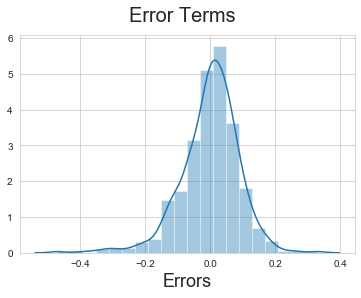

In [135]:
# Ploting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)            # Plot heading                  
plt.xlabel('Errors', fontsize = 18)                   # X-label
plt.show()

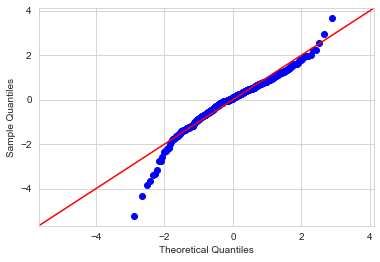

In [136]:
sm.qqplot((y_train - y_train_cnt), fit=True, line='45')
plt.show()

The error terms are normally distributed.

#### Linear Relationship 

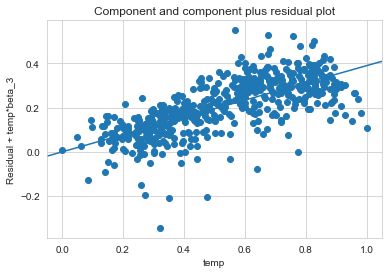

In [137]:
# Checking Linear Relationship
sm.graphics.plot_ccpr(lr_model15, 'temp')
plt.show()

The partial residual plot represents the relationship between the predictor and the dependent variable while taking into account all the other variables. As we can see in the above graph, the linearity is well respected.

#### Absence of Multicollinearity

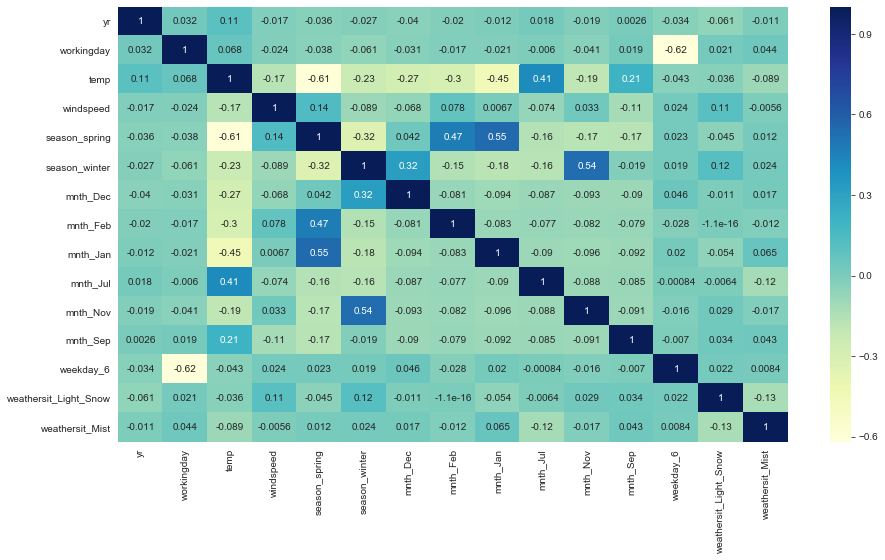

In [138]:
# Checking Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X.corr(),annot=True, cmap='YlGnBu')
plt.show()

All variables have less than or equal to 0.55 correlation with eachother. Checking the VIF now.

In [139]:
print(vif)

                 Features   VIF
2                    temp  6.96
1              workingday  4.58
3               windspeed  4.49
4           season_spring  3.82
5           season_winter  2.61
8                mnth_Jan  2.22
0                      yr  2.07
7                mnth_Feb  1.87
10               mnth_Nov  1.82
12              weekday_6  1.81
6                mnth_Dec  1.58
14        weathersit_Mist  1.57
9                mnth_Jul  1.37
11               mnth_Sep  1.21
13  weathersit_Light_Snow  1.10


Taking 5 as the maximum VIF permissible for this model but as temp has a good corelation and based on the business understanding I decided to keep it.

#### Homoscedasticity

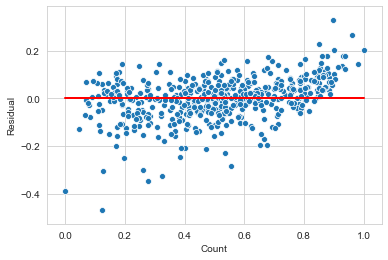

In [140]:
# Validating Homoscedasticity : The residuals have constant variance with respect to the dependent variable
y_train_cnt = lr_model15.predict(X_train_lm)
sns.scatterplot(y_train,(y_train - y_train_cnt))
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

As we can see from the plot above that the homoscedasticity is well and truely respected since the variance of the residuals are almost constant.

#### Independence of residuals (absence of auto-correlation)

Autocorrelation refers to the fact that observations’ errors are correlated <br>
To verify that the observations are not auto-correlated, we can use the Durbin-Watson test. <br>
The test will output values between 0 and 4. The closer it is to 2, the less auto-correlation there is between the various variables.<br>
(0–2: positive auto-correlation, 2–4: negative auto-correlation) 


In [141]:
print('The Durbin-Watson value for Model No.15 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_cnt)),4))

The Durbin-Watson value for Model No.15 is 2.0027


After checking all the assumption this model looks good.

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked all the assumptions of linear model, it's time to go ahead and make predictions using the final, i.e. 14th model.

#### Applying the scaling on the test sets

In [142]:
day_test[num_var] = scaler.fit_transform(day_test[num_var])

In [143]:
day_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow,weathersit_Mist,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.546074,0.530791,0.508362,0.464446,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.027273,0.318182,0.517923
std,0.500809,0.187620,0.459303,0.248645,0.227648,0.200875,0.201498,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.163248,0.466833,0.239498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.329310,0.333953,0.361079,0.319344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.361045
50%,0.000000,0.000000,1.000000,0.545492,0.543153,0.491299,0.449644,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.520681
75%,1.000000,0.000000,1.000000,0.756414,0.719758,0.650989,0.582156,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.687956
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing into X_test and y_test

In [144]:
y_test = day_test.pop('cnt')
X_test = day_test

In [145]:
# Adding constant variable to test dataframe
X_test_m15 = sm.add_constant(X_test)

In [146]:
# Creating X_test_m14 dataframe by dropping variables from X_test_m14

X_test_m15 = X_test_m15.drop(['mnth_Oct','mnth_Mar','weekday_4','weekday_3','mnth_Jun','weekday_5','mnth_Aug','atemp','weekday_2','weekday_1','season_summer','holiday','hum','mnth_May'], axis = 1)

In [147]:
# Making predictions using the 14th model

y_pred_m15 = lr_model15.predict(X_test_m15)

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

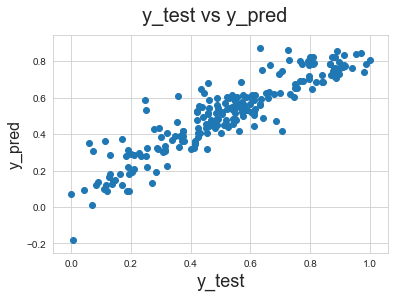

In [148]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m15)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

In [149]:
## Importing the required python liberaries
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [150]:
print('The R-Squared score of the model for the predicted values is',round(r2_score(y_test, y_pred_m15),2))
print('The Root Mean Squared Error of the model for the predicted values is',round(np.sqrt(mean_squared_error(y_test, y_pred_m15)),4))
print('The Mean Absolute Error of the model for the predicted values is',mean_absolute_error(y_test, y_pred_m15))

The R-Squared score of the model for the predicted values is 0.82
The Root Mean Squared Error of the model for the predicted values is 0.1011
The Mean Absolute Error of the model for the predicted values is 0.07697890279011425


In [151]:
## Importing the required python liberaries
# In problem statement we have been asked to find R2_Score of the Predicted model.
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m15)

0.8208934072326263

We can see that the equation of our best fitted line developed in the Model 15 is:

$ cnt = 0.2430 + ( 0.2347  \times  yr + 0.0540  \times  workingday + 0.3900 \times temp - 0.0987 \times windspeed - 0.0920 \times season_spring + 0.0662  \times season_winter - 0.0607 \times mnth_Dec - 0.0460 \times mnth_Feb - 0.0757 \times mnth_Jan - 0.0576 \times mnth_Jul -0.0545 \times mnth_Nov + 0.0520 \times mnth_Sep + 0.0630 \times weekday_6 - 0.2994 \times weathersit_Light_Snow - 0.0799 \times Weathersit_Mist ) $

Since the bookings increase on good weather days with hotter temperature, the company must increase their bike availibilty and promotions during the summer months to further increase their booking count.

An R-Squared value of 0.82 on the test data signifies that the model is a very good predictor and 82% of the variance is captured by the model.